In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from datetime import datetime

In [4]:
X, y = load_diabetes().data, load_diabetes().target.reshape(-1,1)

In [5]:
X.shape, y.shape

((442, 10), (442, 1))

In [134]:
class NN_build(object):
    def __init__(self, eta = 0.005, iterations = 1000, epsilon = 0.01, dims = [10,30,30,1], dropout = 0.5, lam_ = 0.9):
        self.eta = eta
        self.epsilon = epsilon
        self.dims = dims
        self.layer = len(dims)
        self.iterations = iterations
        self.dropout = dropout
        self.lam_ = lam_
        
    def fit(self, X,y):
        X_ = X.T
        y_ = y.T
        A0 = X_
        i = 1
        m_ =len(y)
        cost_ = []
        parameters = {}
        dropout = {}
        
        
        for l in range(1, self.layer):
            #parameters['W'+str(l)] = np.random.randn(self.dims[l], self.dims[l-1]) * self.epsilon
            #he initialize
            parameters['W'+str(l)] = np.random.randn(self.dims[l], self.dims[l-1]) * np.sqrt(2/self.dims[l-1])
            parameters['b'+str(l)] = np.zeros((self.dims[l],1))     
            
        
        while(i != self.iterations):
            time1 = datetime.now()
            
               
            #forward prop
            Z1 = np.dot(parameters['W1'],A0) + parameters['b1']
            A1 = self.sigmoid(Z1)
            Z2 =  np.dot(parameters['W2'],A1) + parameters['b2']
            A2 = self.sigmoid(Z2)
            d2 = np.random.rand(A2.shape[0],A2.shape[1]) < self.dropout  #dropout
            A2 = (A2 * d2) / self.dropout  #dropout, divide to keep expected value
            Z3 =  np.dot(parameters['W3'],A2) + parameters['b3']
            A3 = Z3
            #cost
            L2_reg_cost = (self.lam_/(m_*2)) * (np.sum(np.square(parameters['W1']))+np.sum(np.square(parameters['W2']))+np.sum(np.square(parameters['W3'])))
            cost = self.cost(y_,A3,m_) + L2_reg_cost
            cost_.append(cost)          
            #derivatives
            dZ3 = A3 - y_
            dW3 = (1/m_) * np.dot(dZ3,A2.T) + (self.lam_/m_)* parameters['W3'] # L2 lambda/m * wl
            db3 = (1/m_) * np.sum(dZ3, axis =1 , keepdims=True)
            dZ2 = np.dot(parameters['W3'].T, dZ3) * (A2 * (1-A2))
            dW2 = (1/m_) * np.dot(dZ2,A1.T)  + (self.lam_/m_) * parameters['W2'] # L2 lambda/m * wl
            db2 = (1/m_) * np.sum(dZ2, axis =1 , keepdims=True)
            dZ1 = np.dot(parameters['W2'].T, dZ2) * (A1 * (1-A1))
            dW1 = (1/m_) * np.dot(dZ1,A0.T)  + (self.lam_/m_) * parameters['W1'] # L2 lambda/m * wl
            db1 = (1/m_) * np.sum(dZ1, axis =1 , keepdims=True)         
            #updates
            parameters['W3'] -= self.eta * dW3
            parameters['W2'] -= self.eta * dW2
            parameters['W1'] -= self.eta * dW1
            parameters['b3'] -= self.eta * db3
            parameters['b2'] -= self.eta * db2
            parameters['b1'] -= self.eta * db1
            #inform
            time2 = datetime.now()
            time_step = time2 - time1
            if i % 200 == 0:
                print('epochs_{}::cost:{}::time:{}'.format(i,cost,time_step))
            
            i += 1
        history = pd.DataFrame(cost_ , columns=['cost'])
        plt.figure(figsize = (14,4))
        plt.subplot(1,1,1)
        plt.plot(history.cost)
        plt.show()           
        
        return parameters,A3
    
    
    def cost(self,y_true,y_pred,m_):
        return (1/2*m_ ) * np.sum(np.square(y_true - y_pred))
    
    
    def sigmoid(self,z):
        return 1 / (1 + np.exp(-z))
    

        

epochs_200::cost:646885411.3102261::time:0:00:00.000997
epochs_400::cost:612721001.8960934::time:0:00:00.000997
epochs_600::cost:592560229.0435725::time:0:00:00.001994
epochs_800::cost:575972274.4703754::time:0:00:00.000999
epochs_1000::cost:529621564.2722975::time:0:00:00.001995
epochs_1200::cost:417082825.4909359::time:0:00:00.001021
epochs_1400::cost:362052379.2336648::time:0:00:00.000998
epochs_1600::cost:328775427.839137::time:0:00:00.001995
epochs_1800::cost:333661709.8352474::time:0:00:00.000997
epochs_2000::cost:309879239.2173189::time:0:00:00.000997
epochs_2200::cost:317375388.3719808::time:0:00:00.001995
epochs_2400::cost:325323939.01735413::time:0:00:00.000999
epochs_2600::cost:302747768.70936996::time:0:00:00.000997
epochs_2800::cost:298417894.51274514::time:0:00:00.001994
epochs_3000::cost:299403723.54487306::time:0:00:00.000997
epochs_3200::cost:311406237.86851496::time:0:00:00.001766
epochs_3400::cost:308524110.8473353::time:0:00:00.000997
epochs_3600::cost:303892736.128

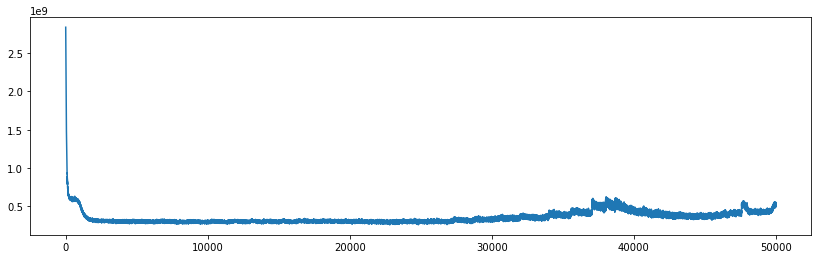

In [135]:
parameters,A3 = NN_build(eta = 0.0005, iterations= 50000, epsilon= 0.01, dims= [10,60,40,1], dropout= 0.7).fit(X,y)

In [136]:
A3

array([[198.3193294 , 142.20030887, 171.72393404, 202.7638827 ,
        104.92412045, 113.74828945, 140.44712681, 122.43084389,
        185.1201249 , 216.28574364, 143.13904452, 180.5065734 ,
        163.97360162, 192.8898634 , 145.42821741, 173.66803081,
        220.59370592, 146.54848036, 135.35327489, 123.50231274,
        130.91504488, 117.25008076, 131.27989473, 177.30148476,
        204.625821  , 121.92126713, 138.4490203 , 195.33148588,
        110.67584988, 167.18475436, 199.651814  , 100.3400584 ,
        178.32316195, 105.20114815, 146.1652333 , 130.59375239,
        199.65940886, 125.71588091, 181.50828225, 178.9852826 ,
        143.15024356, 120.02449494,  91.78325764, 105.57841498,
        104.84134489, 100.32115405,  91.36928924, 101.04044397,
        157.39180044, 162.86587852, 166.33617207, 184.79832503,
        159.33017708, 152.89579393, 135.51273445, 170.44004093,
        195.89871629, 109.05897291, 171.8325303 , 173.49753707,
        152.17744326, 186.60531013, 111.

In [137]:
y

array([[151.],
       [ 75.],
       [141.],
       [206.],
       [135.],
       [ 97.],
       [138.],
       [ 63.],
       [110.],
       [310.],
       [101.],
       [ 69.],
       [179.],
       [185.],
       [118.],
       [171.],
       [166.],
       [144.],
       [ 97.],
       [168.],
       [ 68.],
       [ 49.],
       [ 68.],
       [245.],
       [184.],
       [202.],
       [137.],
       [ 85.],
       [131.],
       [283.],
       [129.],
       [ 59.],
       [341.],
       [ 87.],
       [ 65.],
       [102.],
       [265.],
       [276.],
       [252.],
       [ 90.],
       [100.],
       [ 55.],
       [ 61.],
       [ 92.],
       [259.],
       [ 53.],
       [190.],
       [142.],
       [ 75.],
       [142.],
       [155.],
       [225.],
       [ 59.],
       [104.],
       [182.],
       [128.],
       [ 52.],
       [ 37.],
       [170.],
       [170.],
       [ 61.],
       [144.],
       [ 52.],
       [128.],
       [ 71.],
       [163.],
       [15

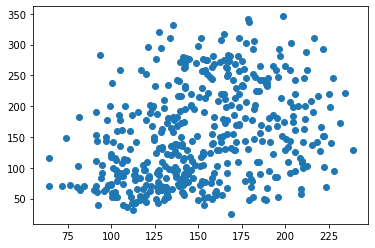

In [138]:
plt.scatter(A3,y)

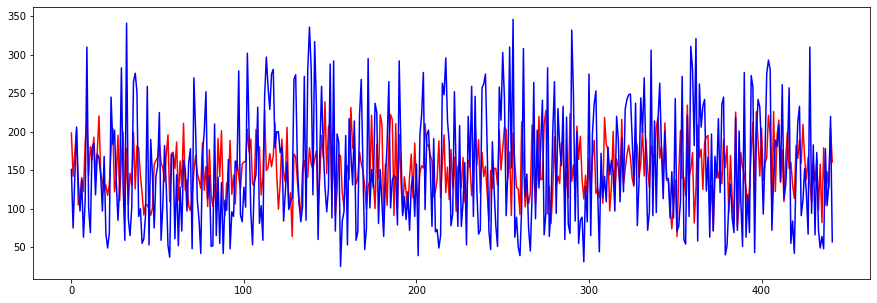

In [139]:
plt.figure(figsize = (15,5))
plt.subplot(1,1,1)
plt.plot(A3.ravel(),'r')
plt.plot(y,'b')
plt.show()

In [129]:
dropout = {}
dropout['d1'] = np.random.rand(parameters['W1'].shape[0],parameters['W1'].shape[1]) < 0.5

In [130]:
parameters['W1'] * dropout['d1']

array([[-0.00000000e+00,  9.62955099e-01, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
         2.26415029e+00, -1.38645754e+00, -0.00000000e+00,
        -2.50177316e+00],
       [ 0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -6.27566908e+01,  4.14257475e+01,
         1.91215754e+02, -5.22271291e+01, -0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  2.33575051e+02, -1.84338248e+02,
        -2.20356100e+02, -4.59662912e+01,  5.70450247e+01,
         2.14615340e+02, -4.12172317e+01, -6.05462112e+02,
         0.00000000e+00],
       [ 0.00000000e+00,  2.17843286e+02, -1.22264102e+02,
        -0.00000000e+00, -5.94491510e+01,  0.00000000e+00,
         2.82929312e+02, -0.00000000e+00, -6.24484367e+02,
         0.00000000e+00],
       [-1.99987859e+01,  0.00000000e+00, -0.00000000e+00,
        -2.18515650e+02, -0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -2.74080289e+01, -6.01416626e+02,
         7.

In [131]:
dropout['d1']

array([[False,  True, False, False, False, False,  True,  True, False,
         True],
       [False, False, False, False,  True,  True,  True,  True, False,
        False],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
        False],
       [False,  True,  True, False,  True, False,  True, False,  True,
        False],
       [ True, False, False,  True, False, False, False,  True,  True,
         True],
       [ True, False, False,  True, False, False, False,  True,  True,
         True],
       [ True,  True,  True, False, False,  True, False,  True,  True,
        False],
       [False,  True,  True,  True,  True, False,  True, False,  True,
         True],
       [ True,  True,  True, False,  True, False, False,  True, False,
         True],
       [False, False, False,  True, False, False, False,  True,  True,
         True],
       [ True, False, False,  True,  True,  True, False,  True,  True,
         True],
       [ True,  True, False,  True, False, 